<a href="https://colab.research.google.com/github/SinVegeta/AIES-lab-experiments/blob/main/AIES_ex_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Name:-Atharva Nalawade                                                                 
Class:- B.Tech B DIV                                                                  
PRN NO. 22SC114501097                                                                  
Title:- Transparency in AI decision making

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report


We import tools for data handling, model training, evaluation, and visualization.

In [2]:
df = pd.read_csv("/content/train (1).csv")


Read the Titanic dataset CSV file into a pandas DataFrame.

In [3]:
df = df[["Survived", "Pclass", "Sex", "Age", "SibSp", "Parch", "Fare", "Embarked"]]
df.dropna(inplace=True)


Keep only useful columns and remove rows with missing values.

In [4]:
df = pd.get_dummies(df, columns=["Sex", "Embarked"], drop_first=True)


Convert "Sex" and "Embarked" columns into numeric dummy variables.

In [5]:
X = df.drop("Survived", axis=1)
y = df["Survived"]


Separate the input features and the output target variable (Survived)

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


Split the data into 70% training and 30% testing sets.

In [7]:
tree = DecisionTreeClassifier(max_depth=4, random_state=0)
tree.fit(X_train, y_train)
y_pred_tree = tree.predict(X_test)


Train a Decision Tree and make predictions on the test data.

In [8]:
forest = RandomForestClassifier(n_estimators=100, random_state=0)
forest.fit(X_train, y_train)
y_pred_forest = forest.predict(X_test)


Train a Random Forest with 100 trees and predict survival

In [9]:
print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_tree))
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_forest))


Decision Tree Accuracy: 0.7102803738317757
Random Forest Accuracy: 0.7897196261682243


Display how accurate each model is on the test set.

In [10]:
print("\nDecision Tree Classification Report:")
print(classification_report(y_test, y_pred_tree))

print("\nRandom Forest Classification Report:")
print(classification_report(y_test, y_pred_forest))



Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.79      0.76       122
           1       0.68      0.61      0.64        92

    accuracy                           0.71       214
   macro avg       0.71      0.70      0.70       214
weighted avg       0.71      0.71      0.71       214


Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.84      0.82       122
           1       0.78      0.72      0.75        92

    accuracy                           0.79       214
   macro avg       0.79      0.78      0.78       214
weighted avg       0.79      0.79      0.79       214



Show precision, recall, F1-score, and support for both models

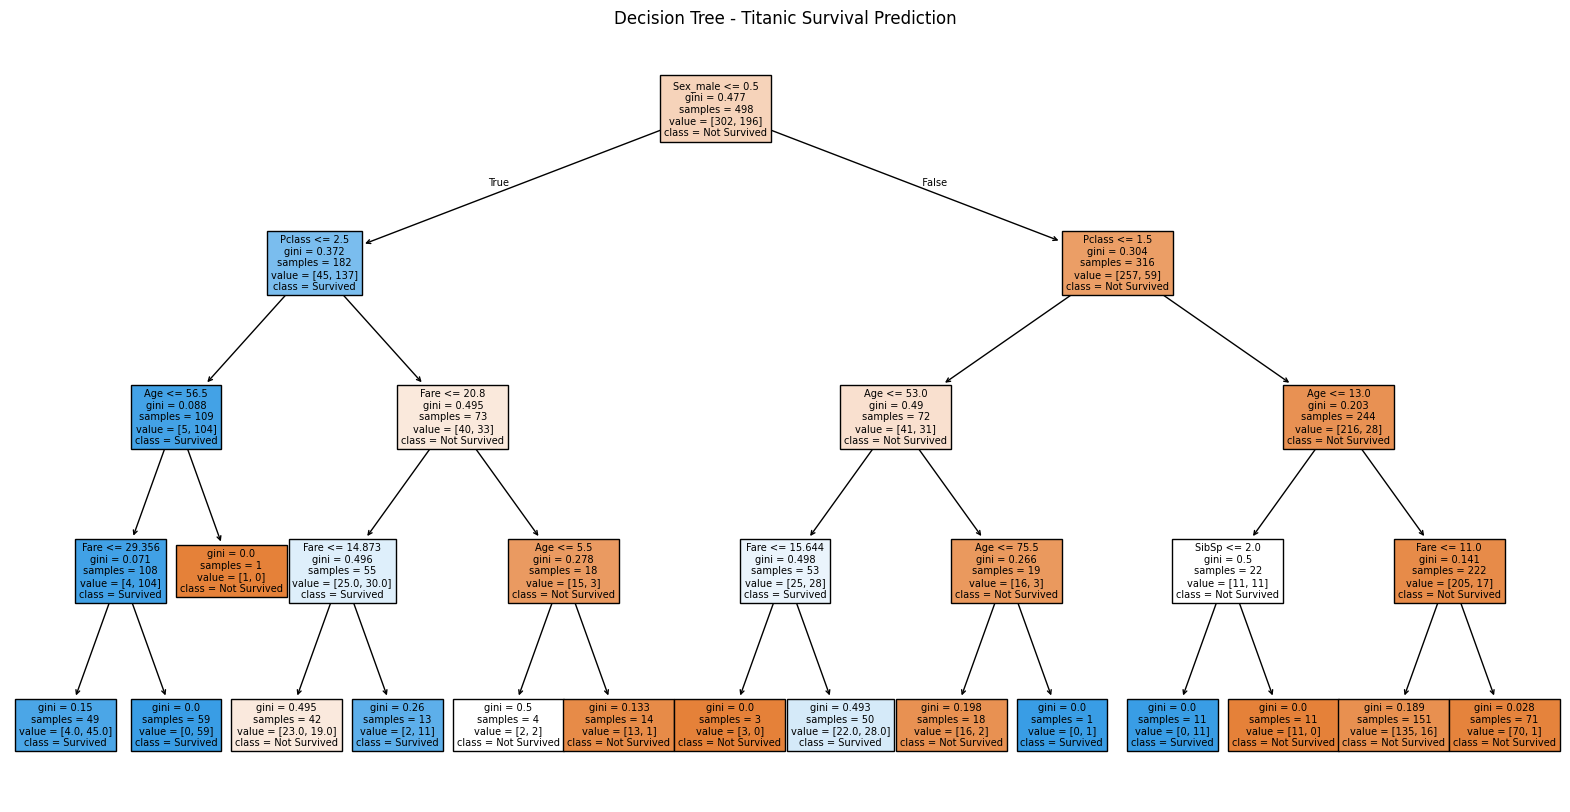

In [11]:
plt.figure(figsize=(20, 10))
plot_tree(tree, feature_names=X.columns, class_names=["Not Survived", "Survived"], filled=True)
plt.title("Decision Tree - Titanic Survival Prediction")
plt.show()


Draw the trained Decision Tree to see how decisions are made visually.